In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
dataset = load_iris()
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


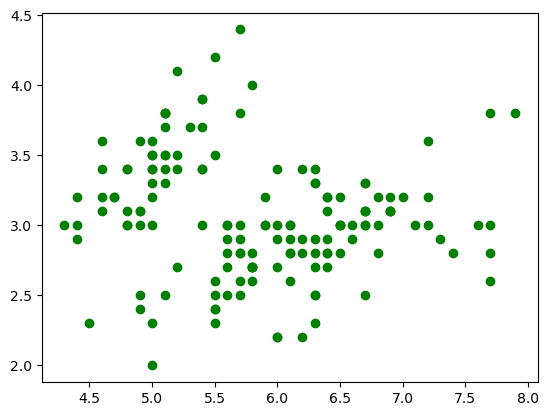

In [15]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = 'green')

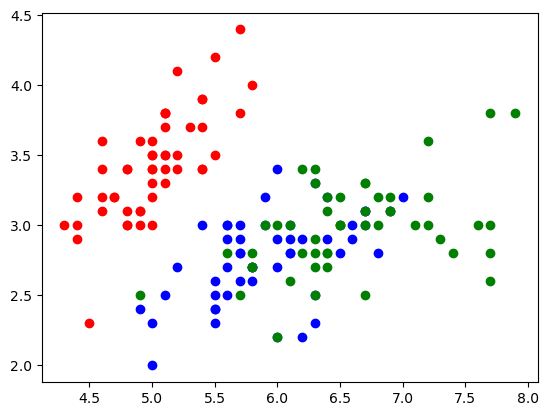

In [18]:
plt.scatter(df[df.target == 0]['sepal length (cm)'], df[df.target == 0]['sepal width (cm)'], color = 'red')
plt.scatter(df[df.target == 1]['sepal length (cm)'], df[df.target == 1]['sepal width (cm)'], color = 'blue')
plt.scatter(df[df.target == 2]['sepal length (cm)'], df[df.target == 2]['sepal width (cm)'], color = 'green')

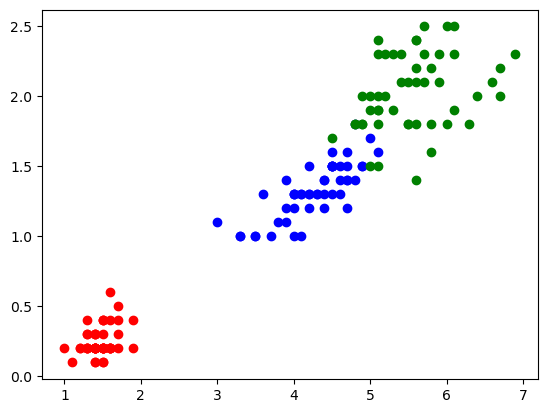

In [21]:
plt.scatter(df[df.target == 0]['petal length (cm)'], df[df.target == 0]['petal width (cm)'], color = 'red')
plt.scatter(df[df.target == 1]['petal length (cm)'], df[df.target == 1]['petal width (cm)'], color = 'blue')
plt.scatter(df[df.target == 2]['petal length (cm)'], df[df.target == 2]['petal width (cm)'], color = 'green')

In [24]:
new_df = df[['petal length (cm)', 'petal width (cm)']]
new_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [25]:
sse = []
for k in range(1, 10):
    mean = KMeans(n_clusters = k)
    mean.fit(new_df)
    sse.append(mean.inertia_)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

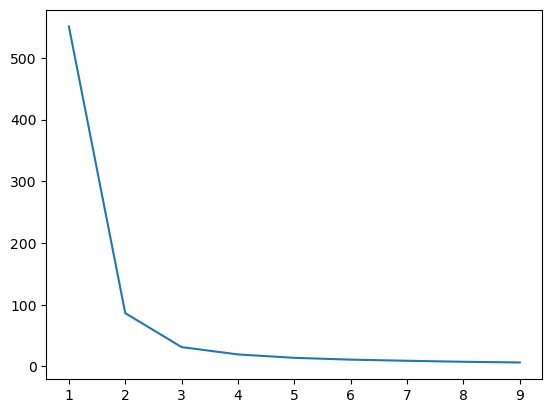

In [27]:
plt.plot(range(1, 10), sse)

In [31]:
means = KMeans(n_clusters = 3)
y_predicted = means.fit_predict(new_df)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
new_df['cluster'] = y_predicted

/var/folders/_k/w4gyds8101g932d0mfzgdgl80000gn/T/ipykernel_23147/2421315905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = y_predicted


In [ ]:
plt.scatter(new_df[new_df == 0]['petal length (cm)'], new_df[new_df == 0]['petal width (cm)'], color = 'red')
plt.scatter(new_df[new_df == 1]['petal length (cm)'], new_df[new_df == 1]['petal width (cm)'], color = 'red')
